In [1]:
from dataset import SequenceDataset, ResidualSequenceDataset
from model import LSTM, Transformer, DLinear
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')
df = preprocess_data(df)

In [4]:
target = 'Close'
features = list(df.columns)
features.append('residuals')

In [5]:
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [6]:
scaled_train_df, scalers = scale_df(train_df)
scaled_test_df = apply_scalers(test_df, scalers)
train_dataset = ResidualSequenceDataset(scaled_train_df, target, features)
test_dataset = ResidualSequenceDataset(scaled_test_df, target, features)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
lstm = LSTM(input_size = 6)
learning_rate=0.001

In [8]:
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [9]:
train(n_epochs=5,
              model=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.18444
batch #: 20, current average train loss: 0.12095
batch #: 40, current average train loss: 0.07250
batch #: 60, current average train loss: 0.05200
batch #: 80, current average train loss: 0.04088
Epoch: 0, train loss: 0.03440
batch #: 0, current average train loss: 0.00360
batch #: 20, current average train loss: 0.00476
batch #: 40, current average train loss: 0.00491
batch #: 60, current average train loss: 0.00478
batch #: 80, current average train loss: 0.00499
Epoch: 1, train loss: 0.00490
batch #: 0, current average train loss: 0.00126
batch #: 20, current average train loss: 0.00373
batch #: 40, current average train loss: 0.00399
batch #: 60, current average train loss: 0.00407
batch #: 80, current average train loss: 0.00411
Epoch: 2, train loss: 0.00400
batch #: 0, current average train loss: 0.00730
batch #: 20, current average train loss: 0.00373
batch #: 40, current average train loss: 0.00327
batch #: 60, current average tra

In [10]:
preds = test(lstm, loss_fn, test_loader, model_type=0)

test loss: 0.00574


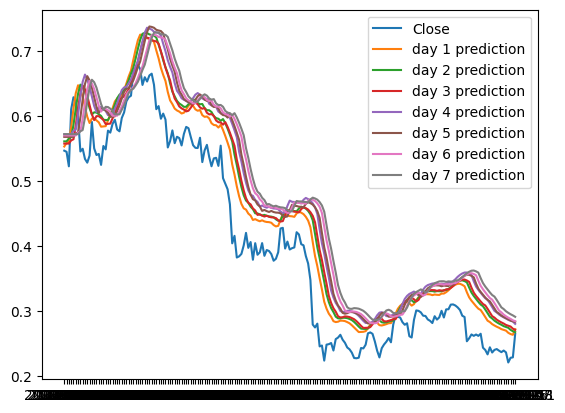

In [11]:
plot_test(scaled_test_df, preds)

In [12]:
new_df = pd.concat((scaled_train_df, scaled_test_df))

In [13]:
dataset = ResidualSequenceDataset(new_df, target, features)
loader = DataLoader(dataset, batch_size=8, shuffle=False)
entire_preds = test(lstm, loss_fn, loader, model_type=0)

test loss: 0.00389


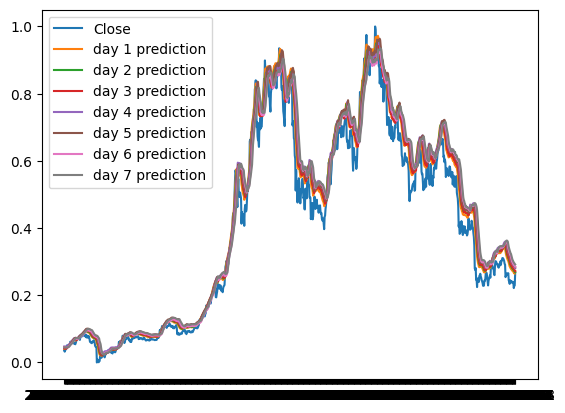

In [14]:
plot_test(new_df, entire_preds)

In [15]:
transformer = Transformer(input_size = 6)
learning_rate=0.001
loss_fn = torch.nn.MSELoss()
optimiser2 = torch.optim.Adam(transformer.parameters(), lr=learning_rate)
train(n_epochs=5,
              model=transformer,
              optimiser=optimiser2,
              loss_fn=loss_fn,
              train_loader=train_loader,
                model_type=1)

batch #: 0, current average train loss: 2.50819
batch #: 20, current average train loss: 0.38133
batch #: 40, current average train loss: 0.21824
batch #: 60, current average train loss: 0.15577
batch #: 80, current average train loss: 0.12279
Epoch: 0, train loss: 0.10403
batch #: 0, current average train loss: 0.02094
batch #: 20, current average train loss: 0.01814
batch #: 40, current average train loss: 0.01808
batch #: 60, current average train loss: 0.01685
batch #: 80, current average train loss: 0.01658
Epoch: 1, train loss: 0.01615
batch #: 0, current average train loss: 0.01009
batch #: 20, current average train loss: 0.01385
batch #: 40, current average train loss: 0.01362
batch #: 60, current average train loss: 0.01285
batch #: 80, current average train loss: 0.01220
Epoch: 2, train loss: 0.01182
batch #: 0, current average train loss: 0.01241
batch #: 20, current average train loss: 0.01129
batch #: 40, current average train loss: 0.01028
batch #: 60, current average tra

test loss: 0.00249


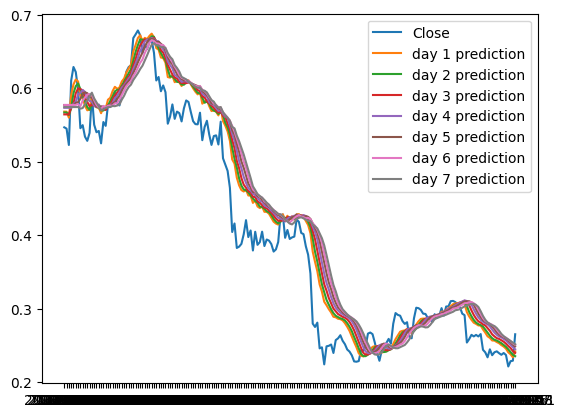

In [16]:
preds2 = test(transformer, loss_fn, test_loader, model_type=1)
plot_test(scaled_test_df, preds2)

In [17]:
dlinear = DLinear(input_size = 6)
learning_rate=0.001
loss_fn = torch.nn.MSELoss()
optimiser3 = torch.optim.Adam(dlinear.parameters(), lr=learning_rate)
train(n_epochs=5,
              model=dlinear,
              optimiser=optimiser3,
              loss_fn=loss_fn,
              train_loader=train_loader)

batch #: 0, current average train loss: 0.52485
batch #: 20, current average train loss: 0.43763
batch #: 40, current average train loss: 0.33353
batch #: 60, current average train loss: 0.25664
batch #: 80, current average train loss: 0.20661
Epoch: 0, train loss: 0.17780
batch #: 0, current average train loss: 0.03621
batch #: 20, current average train loss: 0.03692
batch #: 40, current average train loss: 0.03463
batch #: 60, current average train loss: 0.03377
batch #: 80, current average train loss: 0.03263
Epoch: 1, train loss: 0.03134
batch #: 0, current average train loss: 0.02795
batch #: 20, current average train loss: 0.02163
batch #: 40, current average train loss: 0.02028
batch #: 60, current average train loss: 0.01948
batch #: 80, current average train loss: 0.01821
Epoch: 2, train loss: 0.01697
batch #: 0, current average train loss: 0.00957
batch #: 20, current average train loss: 0.01152
batch #: 40, current average train loss: 0.01068
batch #: 60, current average tra

test loss: 0.00355


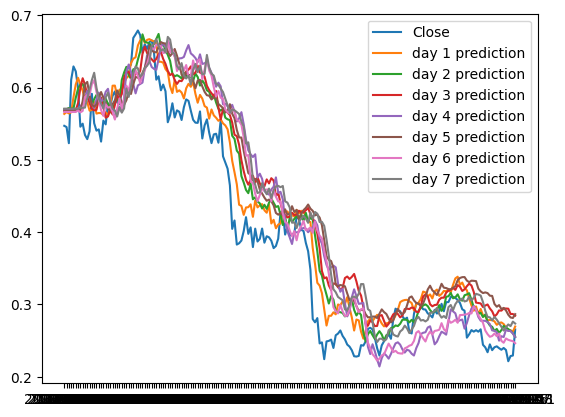

In [18]:
preds3 = test(dlinear, loss_fn, test_loader, model_type=0)
plot_test(scaled_test_df, preds3)